# Exploratory Data Analysis(EDA)

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Apply settings
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
# Load cleaned data
data = pd.read_csv("../data/cleaned_data.csv")

data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
# Data back-up and info
df = data.copy()

## Dataset overview


In [21]:
# Shape of the dataset
print("Dataset shape:", df.shape)


Dataset shape: (7043, 20)


In [22]:
# Dataset Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [33]:
# Column details
all_cols = df.columns.to_list()
numeric_cols = df.select_dtypes(include="number").columns.tolist()
categorical_cols = [c for c in df.select_dtypes(include="object") if c != "Churn"]

print("All columns: \n", all_cols)
print("\nNumeric Columns: \n", numeric_cols)
print("\nCategorical Columns: \n", categorical_cols)


All columns: 
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Numeric Columns: 
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Categorical Columns: 
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [23]:
# Statistical summary
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Null values
print("Null Count Summary: \n")
df.isnull().sum()

Null Count Summary: 



gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Churn Distribution

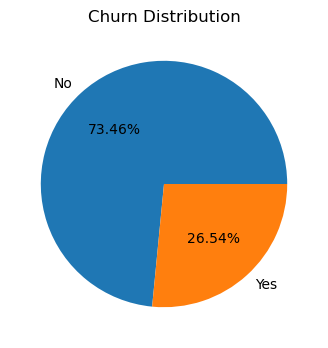

Churn Distribution: 

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [32]:
plt.figure(figsize=(5,4))
churn_distribution = df["Churn"].value_counts()
plt.pie(churn_distribution, autopct = "%.2f%%", labels = df["Churn"].unique())
plt.title("Churn Distribution")
plt.show()

print("Churn Distribution: \n")
print(churn_distribution)

#### Categorical variable distribution

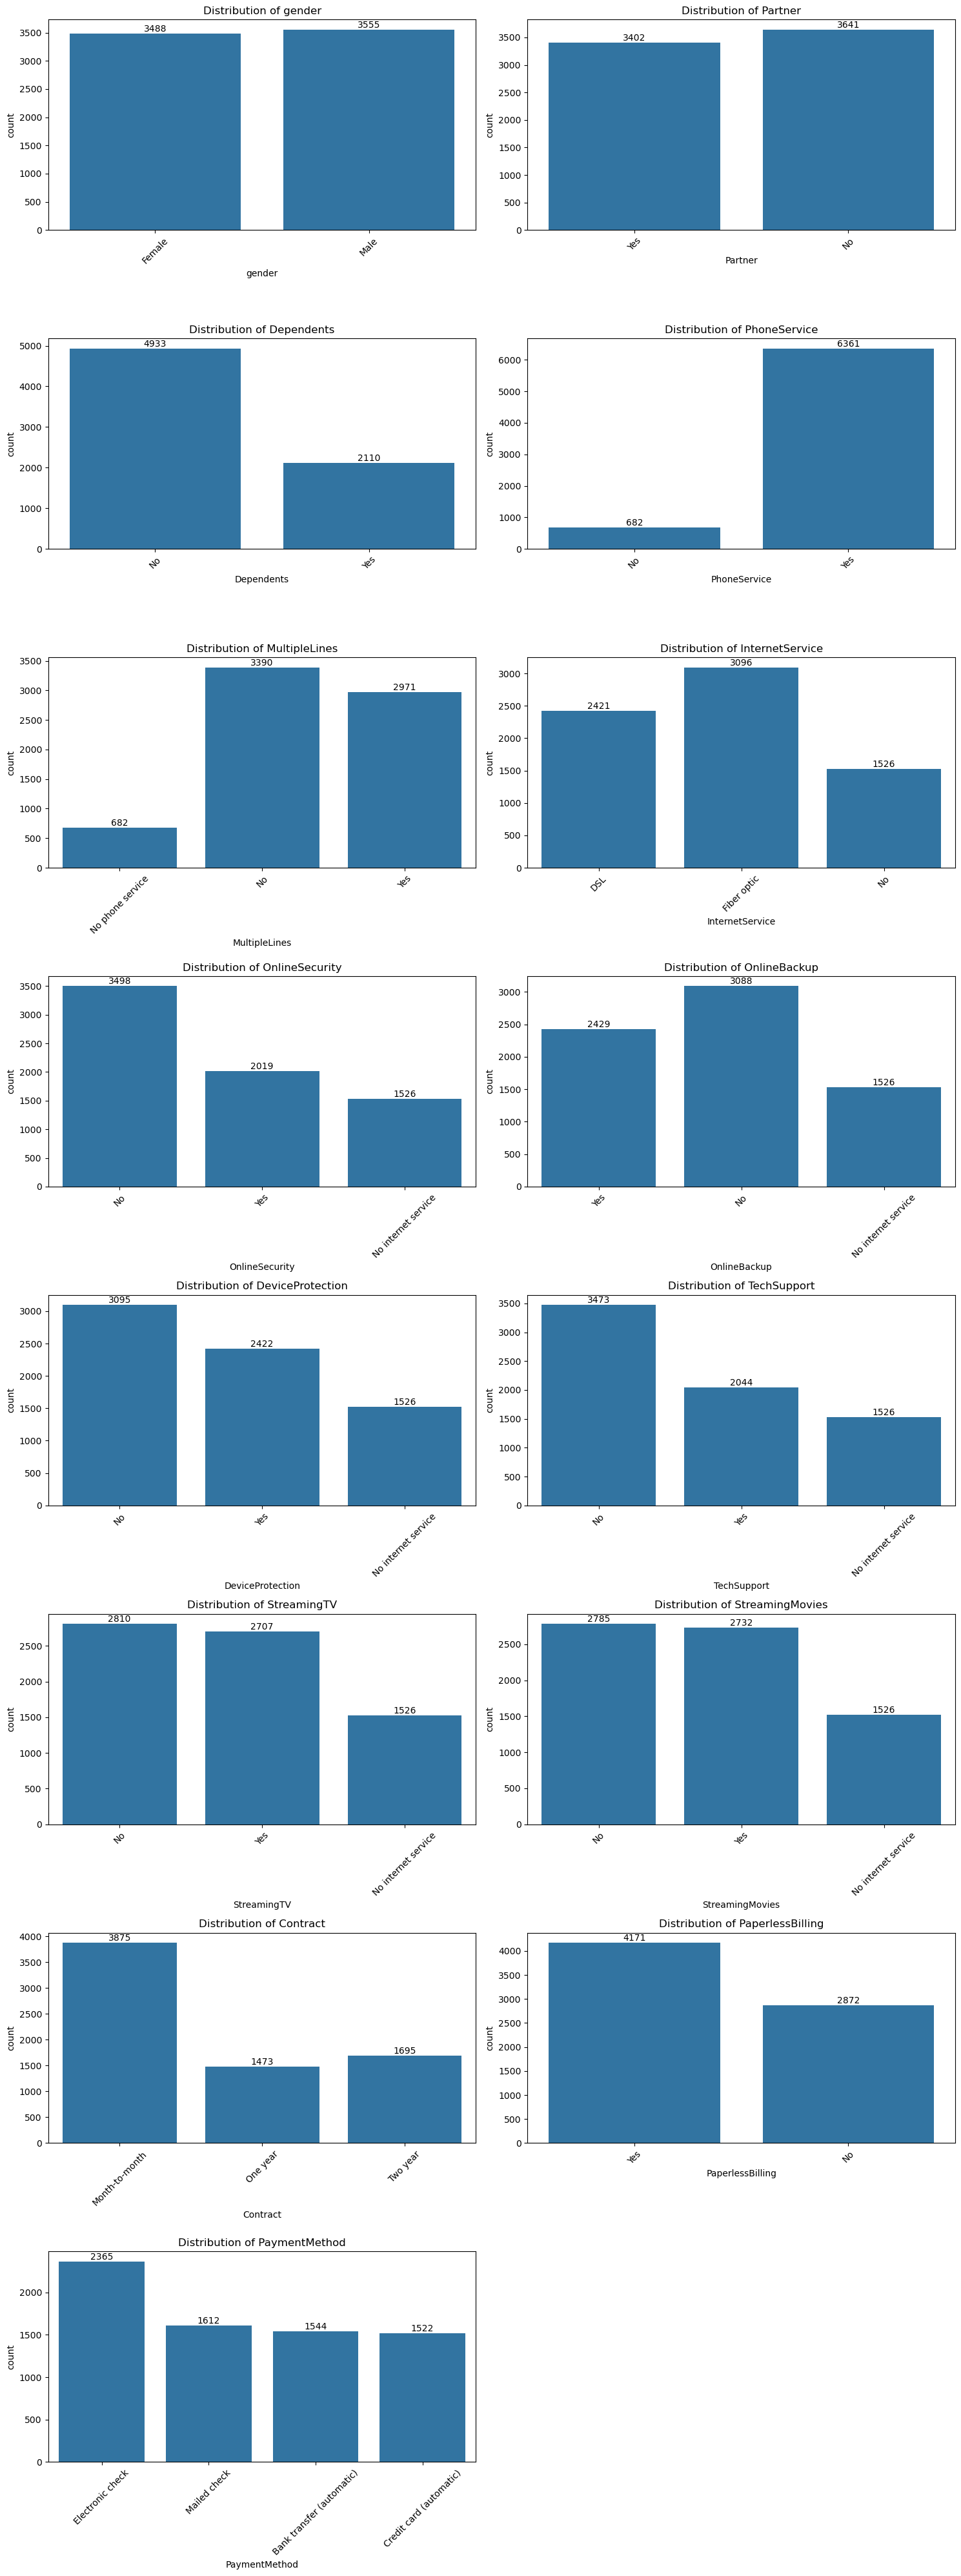

In [39]:
plt.figure(figsize=(15, 40))

for i, col in enumerate(categorical_cols, 1):
    ax = plt.subplot(len(categorical_cols)//2 + 1, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

    # Bar label
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()


#### Numerical variable distribution

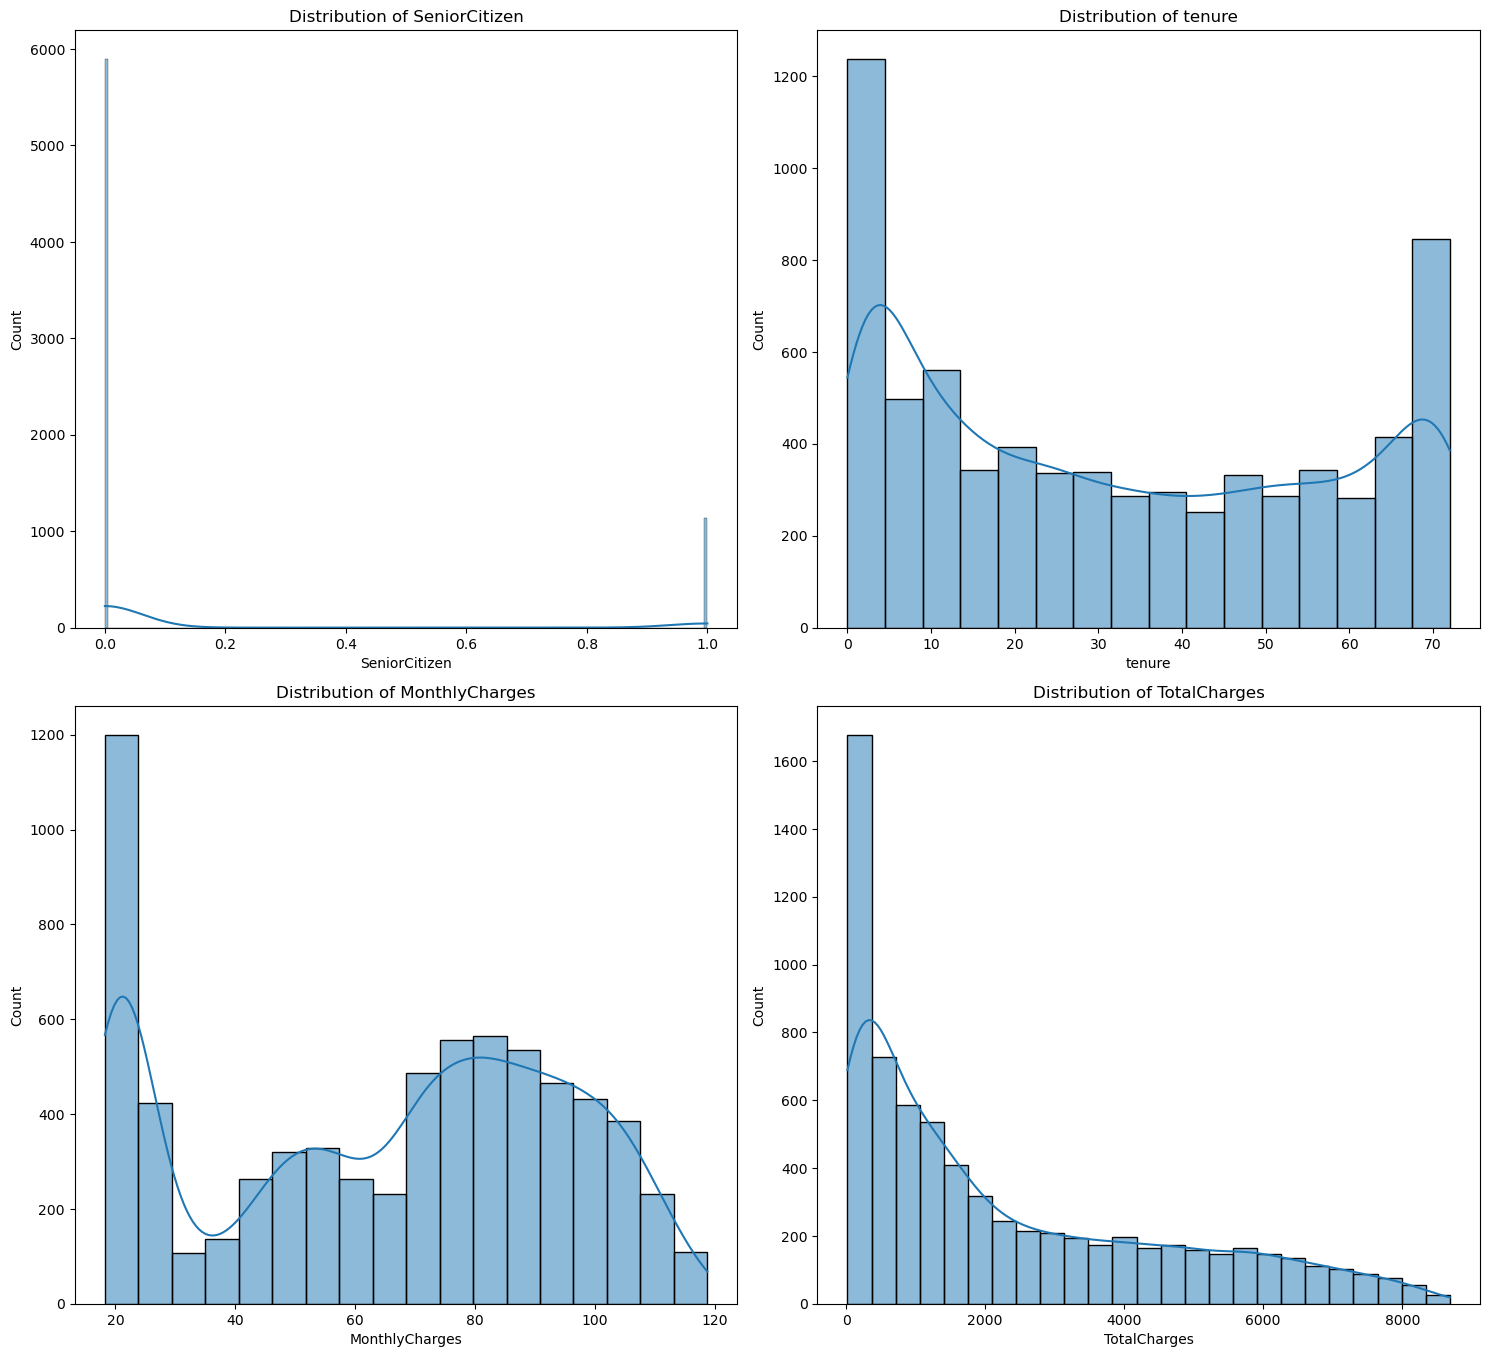

In [40]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

    
plt.tight_layout()
plt.show()


#### Churn Vs. Categorical Variable

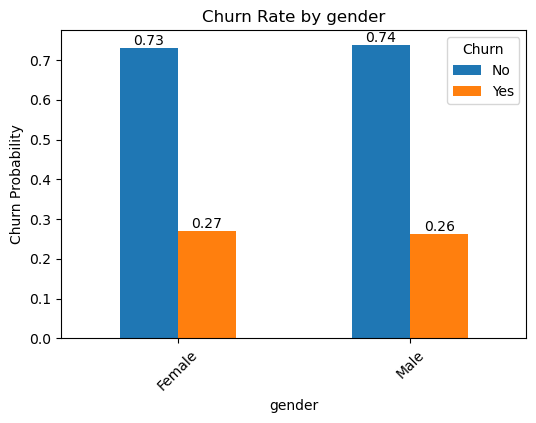

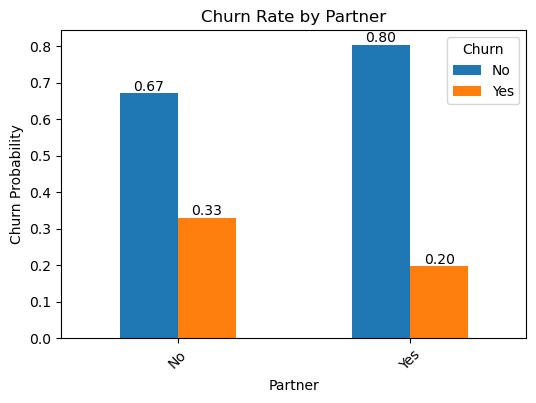

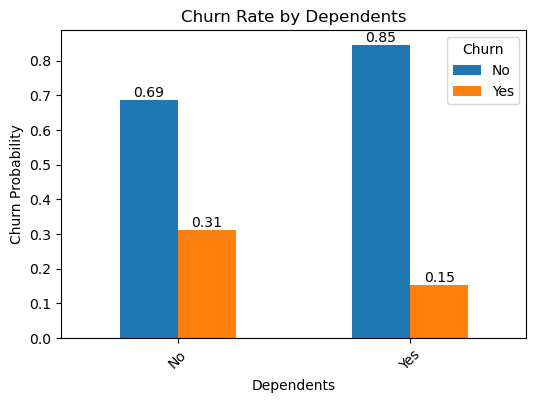

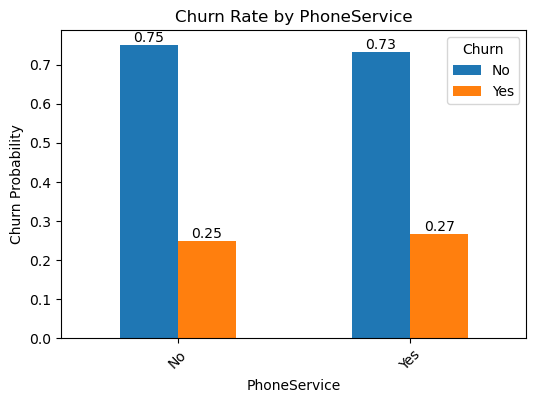

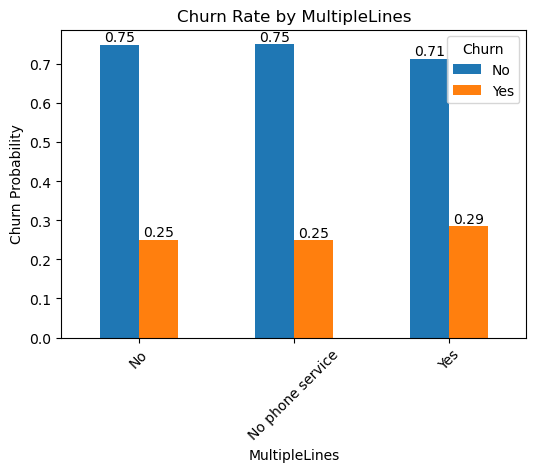

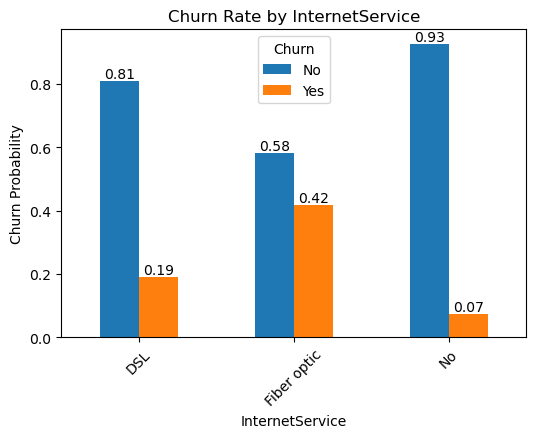

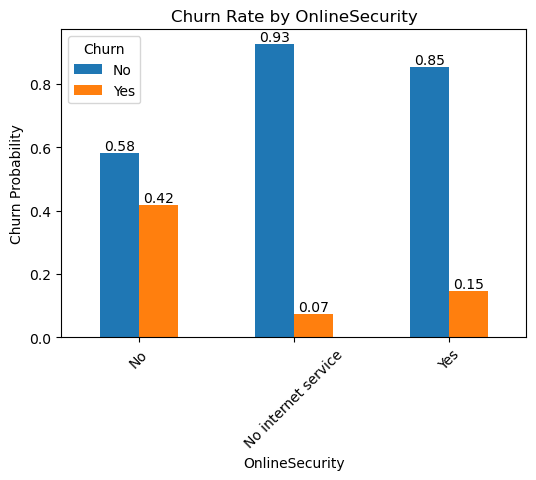

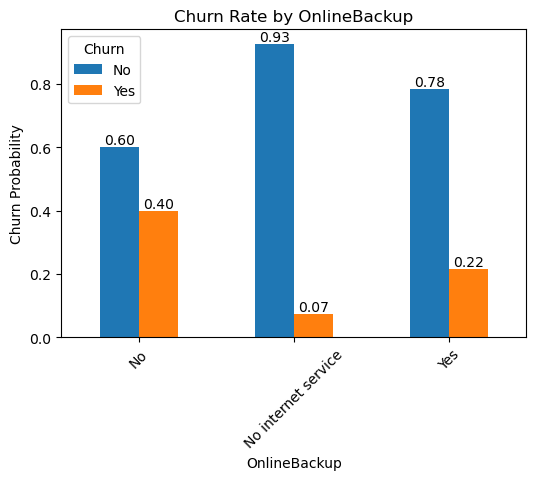

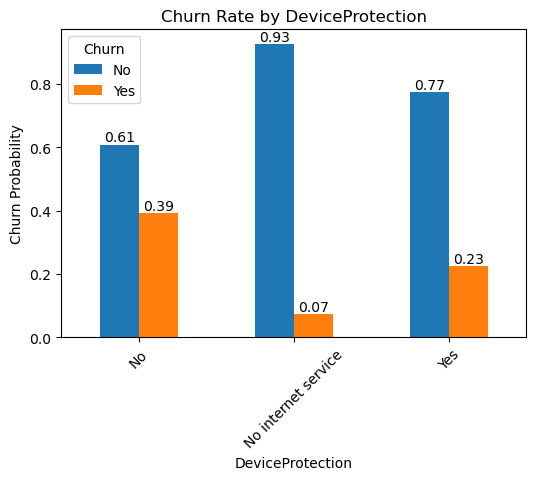

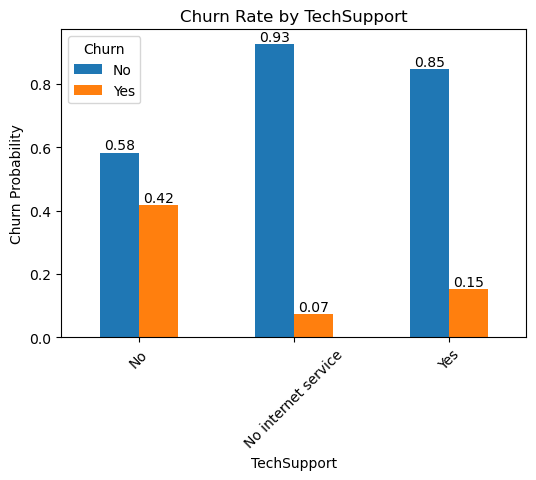

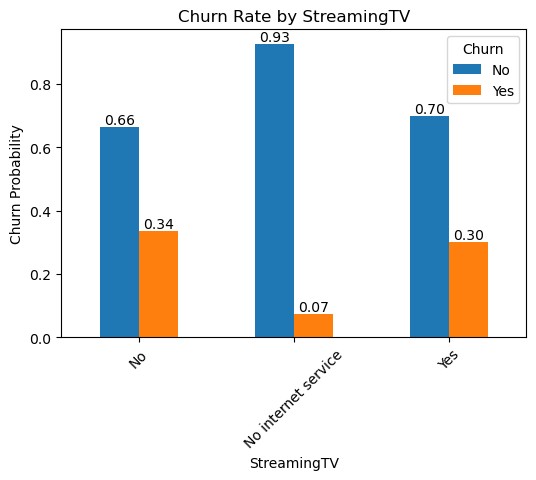

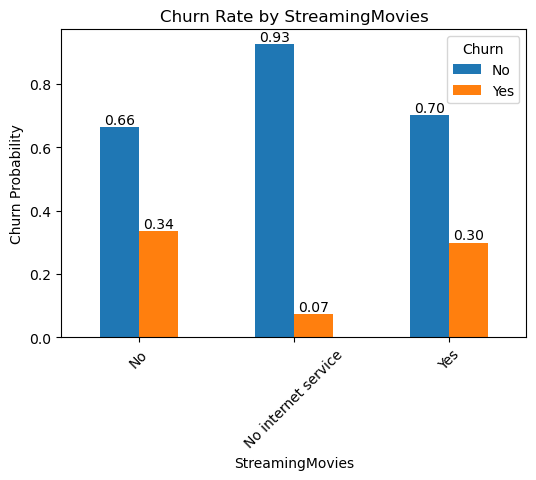

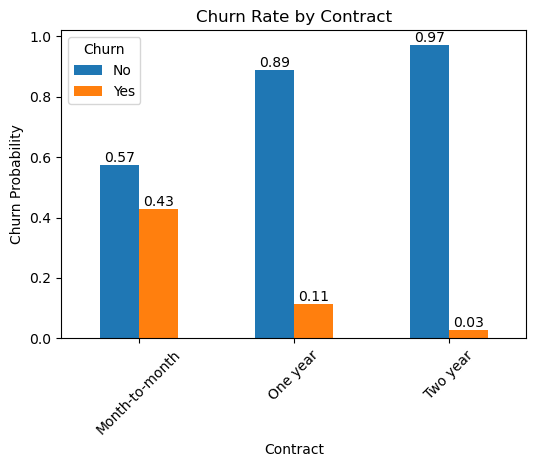

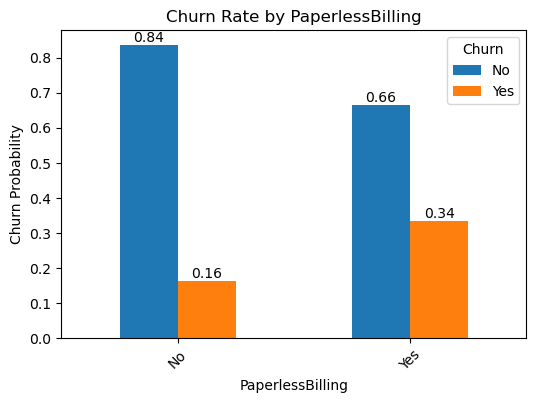

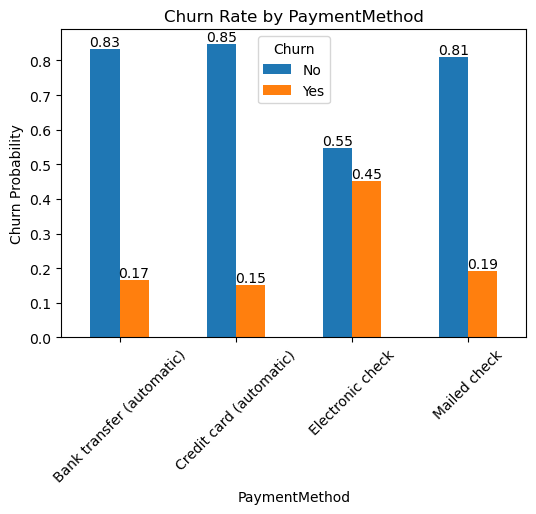

In [43]:
for col in categorical_cols:
    prop = pd.crosstab(df[col], df["Churn"], normalize="index")
    ax = prop.plot(kind="bar", figsize=(6,4))
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Probability")
    plt.xticks(rotation=45)
    
    # Add labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge")
    
    plt.show()

#### Feature-Target Corelation

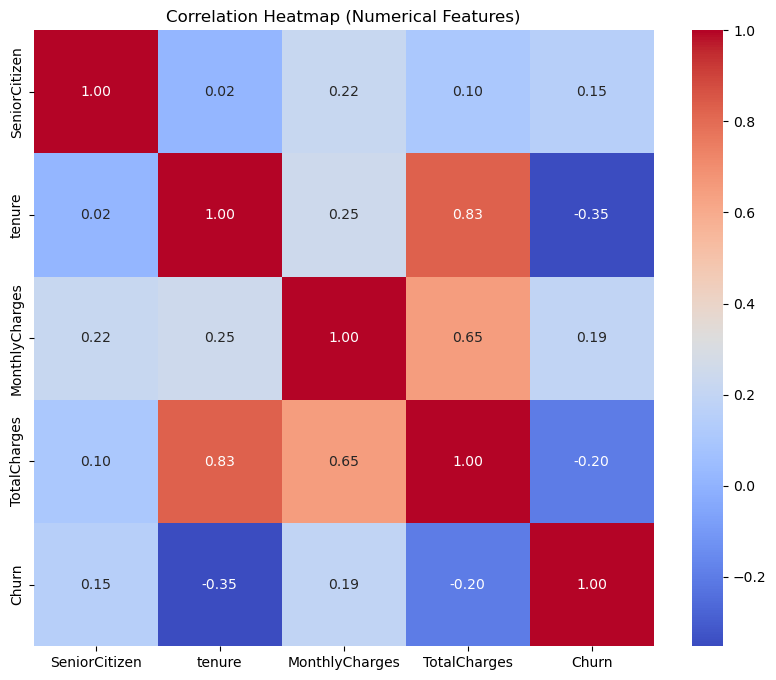

In [48]:
df_corr = df.copy()
target_map = {"No":0, "Yes":1}
df_corr["Churn"] = df_corr["Churn"].map(target_map)
corr_data = df_corr.select_dtypes(include = "number").corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


## Key Insights from EDA

#### Churn Distribution
- Dataset is imbalanced (typically around 26–27% churn).
- Techniques such as SMOTE or class_weight may be needed.

#### Numerical Features
- Tenure shows strong separation: low tenure customers churn more.
- MonthlyCharges & TotalCharges correlate moderately with churn.

#### Categorical Features
- Contract type strongly affects churn — Month-to-month highest churn.
- PaperlessBilling customers show higher churn tendency.
- InternetService = Fiber optic associates with higher churn rates.

#### Correlations
- Tenure and TotalCharges strongly correlate.
- SeniorCitizen has weak correlation with churn but still relevant.

#### Actionable Data Observations
- Some categorical groups have significantly higher churn probabilities.
- Feature engineering opportunities include tenure buckets, charge buckets, etc.
